### SARIMA - Seasonal Autoregressive Integrated Moving Averages

#### In this tutorial, we will examine a sample dataset and apply SARIMA to train and predict future data

In [1]:
# first, import all neccessary library
import pandas as pd
import numpy as np

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings

# set to show plot inline
%matplotlib inline

# ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# load sample dataset
df = pd.read_csv('sample_dataset.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [4]:
# create a new 'date' column from from 'year' and 'month' columns
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

# reset dataframe index by setting the "date" column to be the index
df.set_index('date', inplace=True)

# set the datetime index frequency to be 'Monthly Start'
df.index.freq = 'MS'

# look at the data again
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


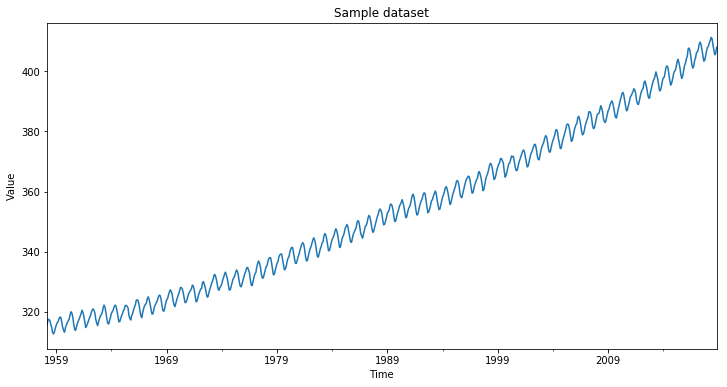

In [5]:
# plot the dataset
title = 'Sample dataset'
ylabel='Value'
xlabel='Time'

ax = df['interpolated'].plot(figsize=(12,6), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#### Perform ETS Decomposition

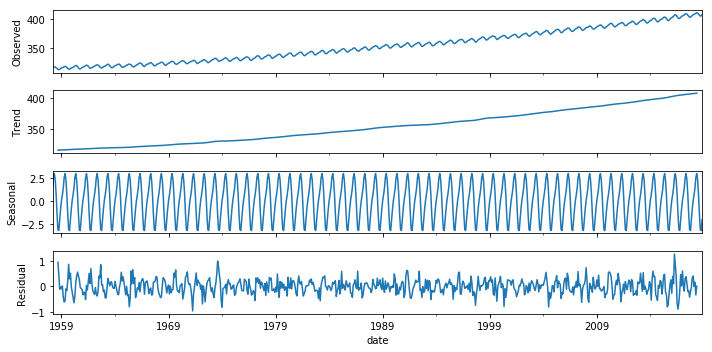

In [12]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5

# ETS decompose
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

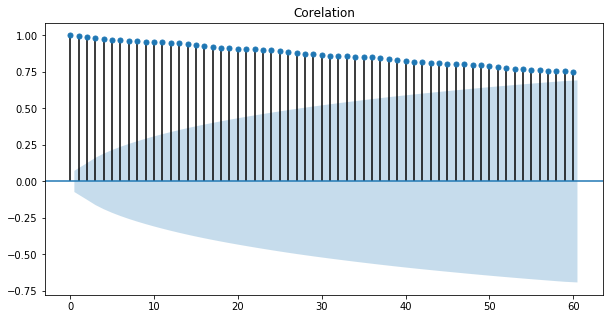

In [16]:
# plot ACF
plot_acf(df['interpolated'], alpha=0.05, title='Corelation', lags=60);

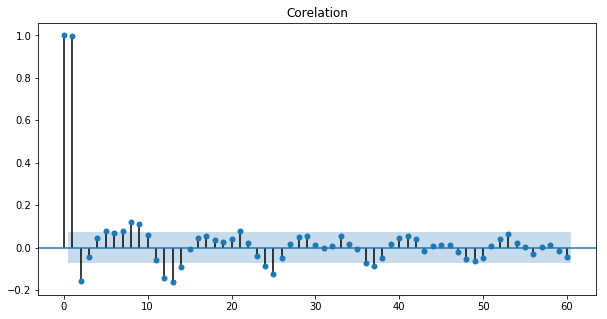

In [18]:
# plot PACF
plot_pacf(df['interpolated'], alpha=0.05, title='Corelation', lags=60);

In [19]:
# use auto-arima from pmdarima to perform grid search for the best-fit model
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood                -208.372
Date:                            Mon, 04 Nov 2019   AIC                            430.744
Time:                                    16:39:29   BIC                            462.877
Sample:                                         0   HQIC                           443.143
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.479e-05      0.000      0.336      0.737      -0.000       0.001
ma.L1         -0.3736      0.033    -11.258      0.000      -0.439      -0.309
ar.S.L12       0.0327      0.014      2.293      0.022       0.005       0.061
ar.S.L24       0.9667      0.014     67.653      0.000       0.939       0.995
ma.S.L12       0.1276      0.029      4.468      0.000       0.072       0.184
ma.S.L24      -0.8664      0.037    -23.344      0.000      -0.939      -0.794
sigma2         0.0951      0.005     18.872      0.000       0.085       0.105
===================================================================================
Ljung-Box (Q):                       50.43   Jarque-Bera (JB):                 4.29
Prob(Q):                              0.12   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
# check the total size of the dataset
len(df)

729

In [21]:
# split to have one year of test data - 12 months
train = df.iloc[:717]
test = df.iloc[717:]

In [22]:
# fit train dataset with SARIMAX model found in the auto_arima search above
model = SARIMAX(train['interpolated'], order=(0,1,1), seasonal_order=(2,0,2,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, 2, 12)   Log Likelihood                -205.142
Date:                            Mon, 04 Nov 2019   AIC                            422.285
Time:                                    16:57:54   BIC                            449.727
Sample:                                03-01-1958   HQIC                           432.882
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3707      0.034    -10.776      0.000      -0.438      -0.303
ar.S.L12       0.8727      0.058     15.092      0.000       0.759       0.986
ar.S.L24       0.1269      0.058      2.196      0.028       0.014       0.240
ma.S.L12      -0.7343      0.053    -13.792      0.000      -0.839      -0.630
ma.S.L24      -0.1140      0.042     -2.743      0.006      -0.196      -0.033
sigma2         0.0960      0.005     20.339      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.89   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# predict the test data to compare with real test data later
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions')

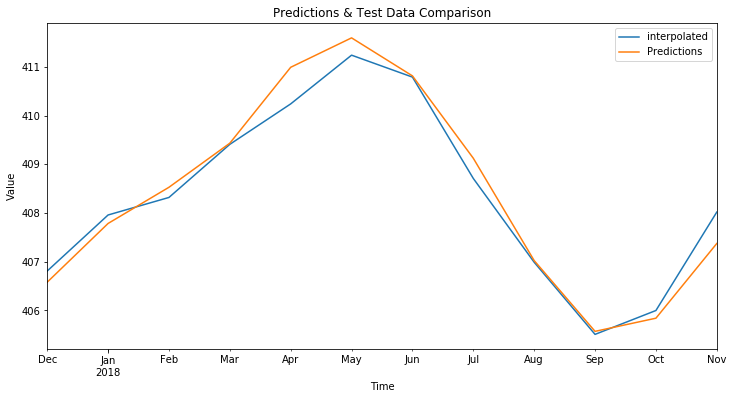

In [24]:
# plot predictions and test data to compare
title = 'Predictions & Test Data Comparison'
ylabel='Value'
xlabel='Time'

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [25]:
# calculate error of prediction using rmse
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'], predictions)
print(f'RMSE Error: {error:11.10}')

RMSE Error: 0.3457982919


In [27]:
# retrain the model with full dataset
model = SARIMAX(df['interpolated'], order=(0,1,1), seasonal_order=(2,0,2,12))
results = model.fit()

# forecast
forecasts = results.predict(len(df), len(df)+11, typ='levels').rename('Forecast')

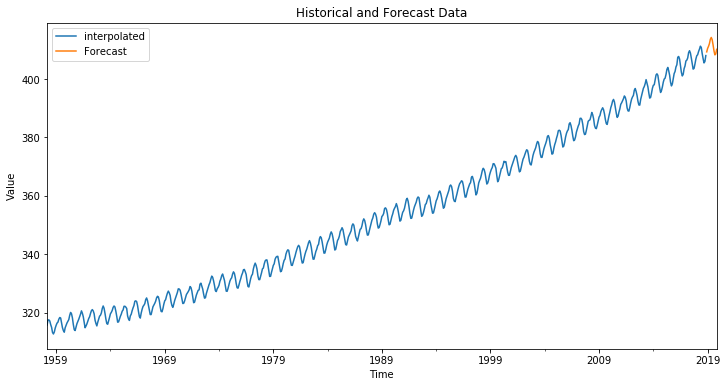

In [32]:
# plot again to compare the forecast and historical data
title = 'Historical and Forecast Data'
ylabel='Value'
xlabel='Time'

ax = df['interpolated'].plot(legend=True, figsize=(12,6), title=title)
forecasts.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### THANK YOU!